In [19]:
import glob
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json
from mpl_toolkits.axes_grid1 import make_axes_locatable


path_ray_results = "/home/thorsten/ray_results/IntersectionExample/"
folder_results = "PPO_MultiAgentIntersectionEnv_sharedPolicy_TeamSpirit-v0_0_2019-03-30_18-08-54osfmm20k_flexibel_2"
training_iteration = 200

In [2]:
def getMetrics(folder_logs):
    filenames_log = glob.glob( folder_logs + "/log_*.csv")

    csvList = []

    for file_ in filenames_log:
        df = pd.read_csv(file_,index_col=None, header=0)
        csvList.append(df)
        
    veh_poss_1 = []
    veh_poss_2 = []

    s_2nd = 0
    
    times = []

    for csv in csvList:
        veh_poss_1.append(csv[['veh_pos_1']].values)
        veh_poss_2.append(csv[['veh_pos_2']].values)
        times.append(np.arange(csv[['veh_pos_1']].values.size)/10.0)
        
    n_episodes = 0
    n_nr2first = 0
    n_successfull = 0
    s_2nd = 0

    # METRIK K U S
    for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
        n_episodes += 1
        
        # METRIK K
        if veh_pos_2[-2] > veh_pos_1[-2]:
            n_nr2first += 1
        # METRIK U S
        if veh_pos_2[-2] > 204.0 or veh_pos_1[-2] > 204.0:
            n_successfull += 1
            # METRIK S
            if veh_pos_2[-2] > veh_pos_1[-2]:
                s_2nd += veh_pos_2[-2] - veh_pos_1[-2]
            else:
                s_2nd += veh_pos_1[-2] - veh_pos_2[-2]
    
    
    K = n_nr2first/n_episodes
    U = n_successfull/n_episodes  
    S = s_2nd / n_successfull
                 
    return K, U, S

In [3]:
k1s = np.zeros((21,21))
k2s = np.zeros((21,21))
k3s = np.zeros((21,21))

for teamspirit_0 in range(-10,11):
    print(teamspirit_0)
    for teamspirit_1 in range(-10,11):
        folder_logs = "/results_run_"+ str(training_iteration) + "_" + str(teamspirit_0/10.0) + "_" + str(teamspirit_1/10.0)
        try:
            k1,k2,k3 = getMetrics(path_ray_results+folder_results+folder_logs)
            k1s[teamspirit_0+10][teamspirit_1+10] = k1
            k2s[teamspirit_0+10][teamspirit_1+10] = k2
            k3s[teamspirit_0+10][teamspirit_1+10] = k3
        except:
            print("Exception")

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10


In [4]:
np.save("metrik_K_"+str(training_iteration)+".npy",k1s)
np.save("metrik_U_"+str(training_iteration)+".npy",k2s)
np.save("metrik_S_"+str(training_iteration)+".npy",k3s)

In [20]:
k1s = np.load("metrik_K_"+str(training_iteration)+".npy")
k2s = np.load("metrik_U_"+str(training_iteration)+".npy")
k3s = np.load("metrik_S_"+str(training_iteration)+".npy")

In [21]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

N_RA = 10
pltAlpha = 0.25

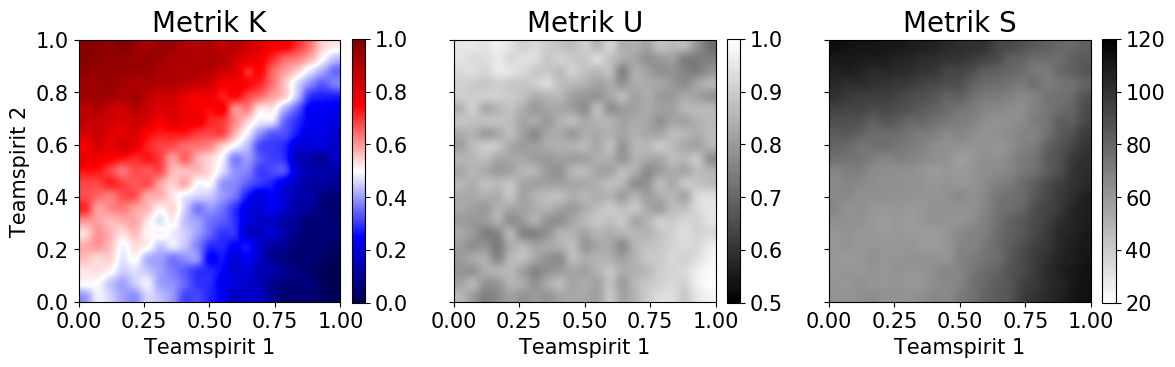

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4),dpi=100,sharey=True)
img1 = ax1.imshow(k1s,cmap='seismic',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img1,ax=ax1,fraction=0.046, pad=0.04)
img1.set_clim(0,1)
ax1.set_title("Metrik K")
ax1.set_xlabel("Teamspirit 1")
ax1.set_ylabel("Teamspirit 2")

img2 = ax2.imshow(k2s,cmap='gray',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img2,ax=ax2,fraction=0.046, pad=0.04)
img2.set_clim(0.5,1)
ax2.set_title("Metrik U")
ax2.set_xlabel("Teamspirit 1")

img3 = ax3.imshow(k3s,cmap='gray_r',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img3,ax=ax3,fraction=0.046, pad=0.04)
img3.set_clim(20,120)
ax3.set_title("Metrik S")
ax3.set_xlabel("Teamspirit 1")

plt.tight_layout()
plt.savefig("./metriken_it_"+str(training_iteration)+".png",dpi=100)

Text(0, 0.5, 'Teamspirit 2')

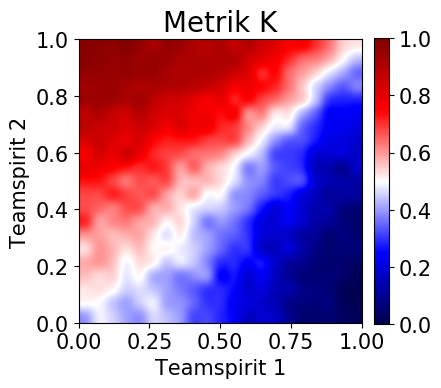

In [8]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
img = ax.imshow(k1s,cmap='seismic',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img,fraction=0.046, pad=0.04)
img.set_clim(0,1)
plt.title("Metrik K")
plt.xlabel("Teamspirit 1")
plt.ylabel("Teamspirit 2")

Text(0, 0.5, 'Teamspirit 2')

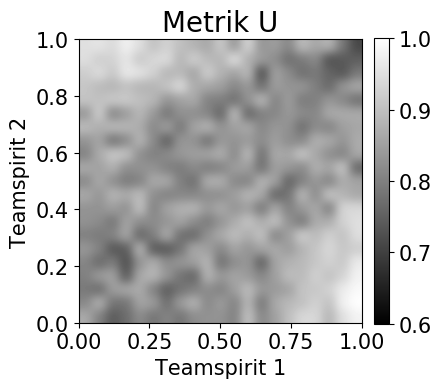

In [9]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
img = ax.imshow(k2s,cmap='gray',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img,fraction=0.046, pad=0.04)
img.set_clim(0.6,1)
plt.title("Metrik U")
plt.xlabel("Teamspirit 1")
plt.ylabel("Teamspirit 2")

Text(0, 0.5, 'Teamspirit 2')

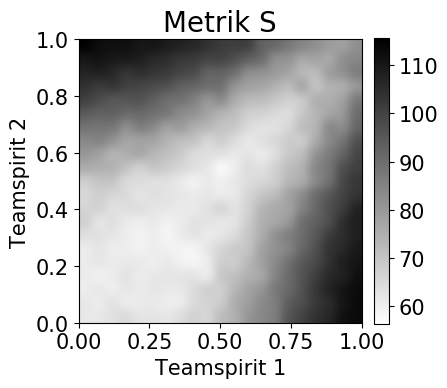

In [10]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
img = ax.imshow(k3s,cmap='gray_r',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img,fraction=0.046, pad=0.04)
#img.set_clim(90,190)
plt.title("Metrik S")
plt.xlabel("Teamspirit 1")
plt.ylabel("Teamspirit 2")